In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd 'drive/My Drive/AI projects/DogsvsCats'

/content/drive/My Drive/AI projects/DogsvsCats


In [3]:
import pandas as pd
data = pd.read_csv('data.csv')
data.head()

,filename,label
0,cat.9089.jpg,cat
1,cat.9110.jpg,cat
2,cat.9079.jpg,cat
3,cat.9096.jpg,cat
4,cat.909.jpg,cat


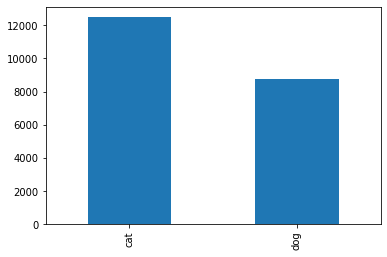

In [4]:
data.label.value_counts().plot.bar()

In [5]:
len(data[data['label'] == 'cat']), len(data[data['label'] == 'dog'])

(12500, 8771)

In [6]:
dog_data = data[data['label'] == 'dog'][:8000]
cat_data = data[data['label'] == 'cat'][:8000]
data = pd.concat([dog_data, cat_data])

In [7]:
data.reset_index(drop= True, inplace= True)

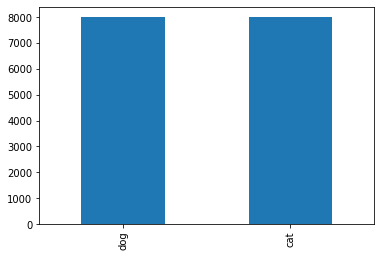

In [8]:
data.label.value_counts().plot.bar()

In [9]:
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(data, test_size= 0.2, random_state= 2020)
train_data.reset_index(drop= True, inplace= True)
val_data.reset_index(drop= True, inplace= True)

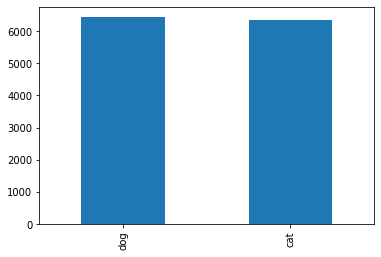

In [10]:
train_data.label.value_counts().plot.bar()

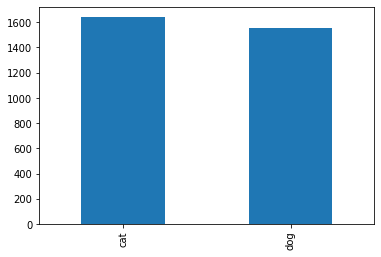

In [11]:
val_data.label.value_counts().plot.bar()

In [13]:
import tensorflow as tf
import keras
TRAIN_DIR = 'train'
IMAGE_SIZE = 32
BATCH_SIZE = 128
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_gen = train_datagen.flow_from_dataframe(dataframe= train_data,
                                              directory= TRAIN_DIR,
                                              x_col = 'filename',
                                              y_col = 'label',
                                              shuffle= True,
                                              target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                              batch_size= BATCH_SIZE,
                                              class_mode = 'categorical')

val_gen = val_datagen.flow_from_dataframe(dataframe= val_data,
                                          directory= TRAIN_DIR,
                                          x_col = 'filename',
                                          y_col = 'label',
                                          shuffle= False,
                                          target_size= (IMAGE_SIZE, IMAGE_SIZE),
                                          batch_size= BATCH_SIZE,
                                          class_mode = 'categorical')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 12799 validated image filenames belonging to 2 classes.
Found 3200 validated image filenames belonging to 2 classes.


In [14]:
# Build model
from keras.layers import Conv2D, BatchNormalization, Dropout, MaxPooling2D, Dense, Flatten
model = keras.Sequential([
                          Conv2D(32, (3,3), activation= 'relu', input_shape= (IMAGE_SIZE, IMAGE_SIZE, 3)),
                          BatchNormalization(),
                          MaxPooling2D((2,2)),
                          Dropout(0.25),

                          Conv2D(64, (3,3), activation= 'relu'),
                          BatchNormalization(),
                          MaxPooling2D((2,2)),
                          Dropout(0.25),

                          Conv2D(128, (3,3), activation= 'relu'),
                          BatchNormalization(),
                          MaxPooling2D((2,2)),
                          Dropout(0.25),

                          Flatten(),
                          Dense(512, activation= 'relu'),
                          Dropout(0.5),
                          Dense(1, activation= 'sigmoid')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [ ]:
# Training phase
LR = 1e-3
NUM_EPOCH= 10
optimizer = keras.optimizers.Adam(learning_rate= LR)
model.compile(optimizer=optimizer, loss= 'binary_crossentropy', metrics= ['accuracy'])
model.fit_generator(generator= train_gen,
                    steps_per_epoch= train_gen.n // BATCH_SIZE,
                    epochs= NUM_EPOCH,
                    verbose= 1,
                    validation_data= val_gen,
                    validation_steps= val_gen.n // BATCH_SIZE,
                    )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
 7/99 [=>............................] - ETA: 37:29 - loss: 1.2201 - accuracy: 0.5000